4. Functional Requirements - LOAN Application Dataset
Req-4	 Access to Loan API Endpoint

4.1 Create a Python program to GET (consume) data from the above API endpoint for the loan application dataset.


In [1]:
import json
import requests
import mysqlSecrets
url = "https://raw.githubusercontent.com/platformps/LoanDataset/main/loan_data.json"

response = requests.get(url)
loan_app_data = response.json()

display(loan_app_data)
print(type(loan_app_data))

[{'Application_ID': 'LP001002',
  'Gender': 'Male',
  'Married': 'No',
  'Dependents': '0',
  'Education': 'Graduate',
  'Self_Employed': 'No',
  'Credit_History': 1,
  'Property_Area': 'Urban',
  'Income': 'medium',
  'Application_Status': 'Y'},
 {'Application_ID': 'LP001003',
  'Gender': 'Male',
  'Married': 'Yes',
  'Dependents': '1',
  'Education': 'Graduate',
  'Self_Employed': 'No',
  'Credit_History': 1,
  'Property_Area': 'Rural',
  'Income': 'medium',
  'Application_Status': 'N'},
 {'Application_ID': 'LP001005',
  'Gender': 'Male',
  'Married': 'Yes',
  'Dependents': '0',
  'Education': 'Graduate',
  'Self_Employed': 'Yes',
  'Credit_History': 1,
  'Property_Area': 'Urban',
  'Income': 'low',
  'Application_Status': 'Y'},
 {'Application_ID': 'LP001006',
  'Gender': 'Male',
  'Married': 'Yes',
  'Dependents': '0',
  'Education': 'Not Graduate',
  'Self_Employed': 'No',
  'Credit_History': 1,
  'Property_Area': 'Urban',
  'Income': 'low',
  'Application_Status': 'Y'},
 {'Applica

<class 'list'>


4.2  Find the status code of the above API endpoint.

Hint: status code could be 200, 400, 404, 401.

In [2]:
print("The status code of the of this API is:", response.status_code)

The status code of the of this API is: 200


4.3 Once Python reads data from the API, utilize PySpark to load data into RDBMS (SQL). The table name should be CDW-SAPP_loan_application in the database.

Note: Use the “creditcard_capstone” database.

In [3]:
import pandas as pd
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('load_app').getOrCreate()

from pyspark.sql import Row
from pyspark.sql.types import StructType, StructField, StringType, IntegerType

# Step 4: Convert the list to a list of Row objects
rows = [Row(**row) for row in loan_app_data]

rows[0:5]

[Row(Application_ID='LP001002', Gender='Male', Married='No', Dependents='0', Education='Graduate', Self_Employed='No', Credit_History=1, Property_Area='Urban', Income='medium', Application_Status='Y'),
 Row(Application_ID='LP001003', Gender='Male', Married='Yes', Dependents='1', Education='Graduate', Self_Employed='No', Credit_History=1, Property_Area='Rural', Income='medium', Application_Status='N'),
 Row(Application_ID='LP001005', Gender='Male', Married='Yes', Dependents='0', Education='Graduate', Self_Employed='Yes', Credit_History=1, Property_Area='Urban', Income='low', Application_Status='Y'),
 Row(Application_ID='LP001006', Gender='Male', Married='Yes', Dependents='0', Education='Not Graduate', Self_Employed='No', Credit_History=1, Property_Area='Urban', Income='low', Application_Status='Y'),
 Row(Application_ID='LP001008', Gender='Male', Married='No', Dependents='0', Education='Graduate', Self_Employed='No', Credit_History=1, Property_Area='Urban', Income='medium', Application_S

In [4]:
# Step 6: Define the schema
schema = StructType([
    StructField("Application_ID", StringType(), True),
    StructField("Gender", StringType(), True),
    StructField("Married", StringType(), True),
    StructField("Dependents", StringType(), True),
    StructField("Education", StringType(), True),
    StructField("Self_Employed", StringType(), True),
    StructField("Credit_History", IntegerType(), True),
    StructField("Property_Area", StringType(), True),
    StructField("Income", StringType(), True),
    StructField("Application_Status", StringType(), True),

])

# Step 7: Create a DataFrame
df_loan = spark.createDataFrame(rows, schema)
df_loan.show()

+--------------+------+-------+----------+------------+-------------+--------------+-------------+------+------------------+
|Application_ID|Gender|Married|Dependents|   Education|Self_Employed|Credit_History|Property_Area|Income|Application_Status|
+--------------+------+-------+----------+------------+-------------+--------------+-------------+------+------------------+
|      LP001002|  Male|     No|         0|    Graduate|           No|             1|        Urban|medium|                 Y|
|      LP001003|  Male|    Yes|         1|    Graduate|           No|             1|        Rural|medium|                 N|
|      LP001005|  Male|    Yes|         0|    Graduate|          Yes|             1|        Urban|   low|                 Y|
|      LP001006|  Male|    Yes|         0|Not Graduate|           No|             1|        Urban|   low|                 Y|
|      LP001008|  Male|     No|         0|    Graduate|           No|             1|        Urban|medium|                 Y|


In [5]:
df_loan = df_loan.select("Application_ID", "Gender","Married",
                         "Dependents", "Education", "Self_Employed", "Credit_History", "Property_Area", "Income","Application_Status")
df_loan.show(5)

+--------------+------+-------+----------+------------+-------------+--------------+-------------+------+------------------+
|Application_ID|Gender|Married|Dependents|   Education|Self_Employed|Credit_History|Property_Area|Income|Application_Status|
+--------------+------+-------+----------+------------+-------------+--------------+-------------+------+------------------+
|      LP001002|  Male|     No|         0|    Graduate|           No|             1|        Urban|medium|                 Y|
|      LP001003|  Male|    Yes|         1|    Graduate|           No|             1|        Rural|medium|                 N|
|      LP001005|  Male|    Yes|         0|    Graduate|          Yes|             1|        Urban|   low|                 Y|
|      LP001006|  Male|    Yes|         0|Not Graduate|           No|             1|        Urban|   low|                 Y|
|      LP001008|  Male|     No|         0|    Graduate|           No|             1|        Urban|medium|                 Y|


In [6]:
# creating a table called 'CDW-SAPP_loan_application' into creditcard_capstone database from SparkSQL Dataframe by connecting mysql workbench

df_loan.write.format("jdbc") \
  .mode("append") \
  .option("url", "jdbc:mysql://localhost:3306/creditcard_capstone") \
  .option("dbtable", "creditcard_capstone.CDW-SAPP_loan_application") \
  .option("user", mysqlSecrets.mysql_username) \
  .option("password", mysqlSecrets.mysql_password) \
  .save()

Py4JJavaError: An error occurred while calling o58.save.
: java.sql.SQLSyntaxErrorException: You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near '-SAPP_loan_application (`Application_ID` TEXT , `Gender` TEXT , `Married` TEXT ,' at line 1
	at com.mysql.cj.jdbc.exceptions.SQLError.createSQLException(SQLError.java:120)
	at com.mysql.cj.jdbc.exceptions.SQLExceptionsMapping.translateException(SQLExceptionsMapping.java:122)
	at com.mysql.cj.jdbc.StatementImpl.executeUpdateInternal(StatementImpl.java:1333)
	at com.mysql.cj.jdbc.StatementImpl.executeLargeUpdate(StatementImpl.java:2106)
	at com.mysql.cj.jdbc.StatementImpl.executeUpdate(StatementImpl.java:1243)
	at org.apache.spark.sql.execution.datasources.jdbc.JdbcUtils$.executeStatement(JdbcUtils.scala:1083)
	at org.apache.spark.sql.execution.datasources.jdbc.JdbcUtils$.createTable(JdbcUtils.scala:913)
	at org.apache.spark.sql.execution.datasources.jdbc.JdbcRelationProvider.createRelation(JdbcRelationProvider.scala:81)
	at org.apache.spark.sql.execution.datasources.SaveIntoDataSourceCommand.run(SaveIntoDataSourceCommand.scala:47)
	at org.apache.spark.sql.execution.command.ExecutedCommandExec.sideEffectResult$lzycompute(commands.scala:75)
	at org.apache.spark.sql.execution.command.ExecutedCommandExec.sideEffectResult(commands.scala:73)
	at org.apache.spark.sql.execution.command.ExecutedCommandExec.executeCollect(commands.scala:84)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.$anonfun$applyOrElse$1(QueryExecution.scala:98)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:118)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:195)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:103)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:827)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:65)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.applyOrElse(QueryExecution.scala:98)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.applyOrElse(QueryExecution.scala:94)
	at org.apache.spark.sql.catalyst.trees.TreeNode.$anonfun$transformDownWithPruning$1(TreeNode.scala:512)
	at org.apache.spark.sql.catalyst.trees.CurrentOrigin$.withOrigin(TreeNode.scala:104)
	at org.apache.spark.sql.catalyst.trees.TreeNode.transformDownWithPruning(TreeNode.scala:512)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.org$apache$spark$sql$catalyst$plans$logical$AnalysisHelper$$super$transformDownWithPruning(LogicalPlan.scala:31)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.transformDownWithPruning(AnalysisHelper.scala:267)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.transformDownWithPruning$(AnalysisHelper.scala:263)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.transformDownWithPruning(LogicalPlan.scala:31)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.transformDownWithPruning(LogicalPlan.scala:31)
	at org.apache.spark.sql.catalyst.trees.TreeNode.transformDown(TreeNode.scala:488)
	at org.apache.spark.sql.execution.QueryExecution.eagerlyExecuteCommands(QueryExecution.scala:94)
	at org.apache.spark.sql.execution.QueryExecution.commandExecuted$lzycompute(QueryExecution.scala:81)
	at org.apache.spark.sql.execution.QueryExecution.commandExecuted(QueryExecution.scala:79)
	at org.apache.spark.sql.execution.QueryExecution.assertCommandExecuted(QueryExecution.scala:133)
	at org.apache.spark.sql.DataFrameWriter.runCommand(DataFrameWriter.scala:856)
	at org.apache.spark.sql.DataFrameWriter.saveToV1Source(DataFrameWriter.scala:387)
	at org.apache.spark.sql.DataFrameWriter.saveInternal(DataFrameWriter.scala:360)
	at org.apache.spark.sql.DataFrameWriter.save(DataFrameWriter.scala:247)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:75)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:52)
	at java.base/java.lang.reflect.Method.invoke(Method.java:578)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:1623)


In [19]:
df_loan=spark.read.format("jdbc").options(driver="com.mysql.cj.jdbc.Driver",\
 user = mysqlSecrets.mysql_username,\
 password = mysqlSecrets.mysql_password,\
 url="jdbc:mysql://localhost:3306/creditcard_capstone",\
 dbtable="creditcard_capstone.CDW-SAPP_loan_application").load()
df_loan.show(5)

Py4JJavaError: An error occurred while calling o153.load.
: java.sql.SQLSyntaxErrorException: You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near '-SAPP_loan_application WHERE 1=0' at line 1
	at com.mysql.cj.jdbc.exceptions.SQLError.createSQLException(SQLError.java:120)
	at com.mysql.cj.jdbc.exceptions.SQLExceptionsMapping.translateException(SQLExceptionsMapping.java:122)
	at com.mysql.cj.jdbc.ClientPreparedStatement.executeInternal(ClientPreparedStatement.java:953)
	at com.mysql.cj.jdbc.ClientPreparedStatement.executeQuery(ClientPreparedStatement.java:1003)
	at org.apache.spark.sql.execution.datasources.jdbc.JDBCRDD$.getQueryOutputSchema(JDBCRDD.scala:68)
	at org.apache.spark.sql.execution.datasources.jdbc.JDBCRDD$.resolveTable(JDBCRDD.scala:58)
	at org.apache.spark.sql.execution.datasources.jdbc.JDBCRelation$.getSchema(JDBCRelation.scala:241)
	at org.apache.spark.sql.execution.datasources.jdbc.JdbcRelationProvider.createRelation(JdbcRelationProvider.scala:37)
	at org.apache.spark.sql.execution.datasources.DataSource.resolveRelation(DataSource.scala:346)
	at org.apache.spark.sql.DataFrameReader.loadV1Source(DataFrameReader.scala:229)
	at org.apache.spark.sql.DataFrameReader.$anonfun$load$2(DataFrameReader.scala:211)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.sql.DataFrameReader.load(DataFrameReader.scala:211)
	at org.apache.spark.sql.DataFrameReader.load(DataFrameReader.scala:172)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:75)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:52)
	at java.base/java.lang.reflect.Method.invoke(Method.java:578)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:1623)


5. Functional Requirements - Data Analysis and Visualization for LOAN Application

After the data is loaded into the database, the business analyst team wants to analyze and visualize the data.
Use Python libraries for the below requirements:

Req-5	Data Analysis and Visualization

Functional Requirements 5.1	

Find and plot the percentage of applications approved for self-employed applicants.
Note: Save a copy of the visualization to a folder in your github, making sure it is PROPERLY NAMED!

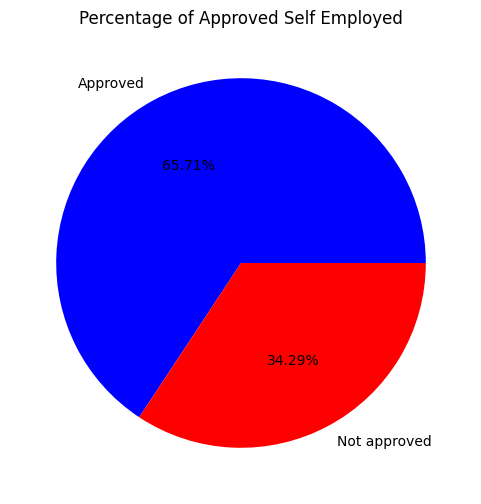

In [7]:
from matplotlib import pyplot as plt
import numpy as np

def  approved_self_emp ():

    df_loan.createOrReplaceTempView("loan_application")

    self_emp_all = spark.sql(f"select * from loan_application where Self_Employed = 'Yes'").count()


    self_emp_approved = spark.sql(f"select * from loan_application where Self_Employed = 'Yes' AND Application_Status ='Y'").count()
    lables = ["Approved", "Not approved"]
    if self_emp_all == 0:
        approved_app_percentage = 0
    else:
        approved_app_percentage = (self_emp_approved / self_emp_all) * 100

    fig = plt.figure(figsize =(6, 6))

    plt.pie([approved_app_percentage, 100 - approved_app_percentage], colors=['blue', 'red'], labels=lables, autopct='%1.2f%%' )
    plt.title("Percentage of Approved Self Employed")
    plt.show()
approved_self_emp()

Functional Requirements 5.2	

Find the percentage of rejection for married male applicants.
Note: Save a copy of the visualization to a folder in your github, making sure it is PROPERLY NAMED!

The percentage of rejected married male applicants is 28.43%


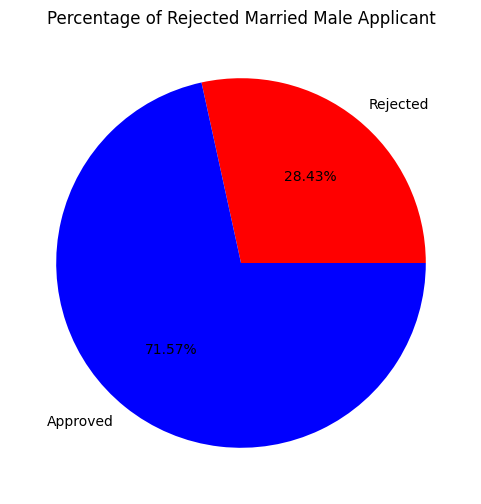

In [8]:
def rejected_married_M():
    married_male = spark.sql("select * from loan_application where Gender = 'Male' AND Married = 'Yes'").count()
    married_male_reje = spark.sql("select * from loan_application where Gender = 'Male' AND Married = 'Yes' AND Application_Status = 'N'").count()
    lables = ["Rejected", "Approved"]

    if married_male == 0:
        rejected_app_percentage = 0
    else:
        rejected_app_percentage = (married_male_reje / married_male) * 100
    print("The percentage of rejected married male applicants is " + str(round(rejected_app_percentage, 2)) + '%')
    fig = plt.figure(figsize =(6, 6))

    plt.pie([rejected_app_percentage, 100 - rejected_app_percentage], colors=['red', 'blue'], labels=lables, autopct='%1.2f%%' )
    plt.title("Percentage of Rejected Married Male Applicant")
    plt.show()
rejected_married_M()

Functional Requirements 5.3	

Find and plot the top three months with the largest volume of transaction data.
Note: Save a copy of the visualization to a folder in your github, making sure it is PROPERLY NAMED!



    month  total_TRANSACTION_VALUE
0  201811               4192710.90
1  201812               4082617.65
2  201810               3038758.35


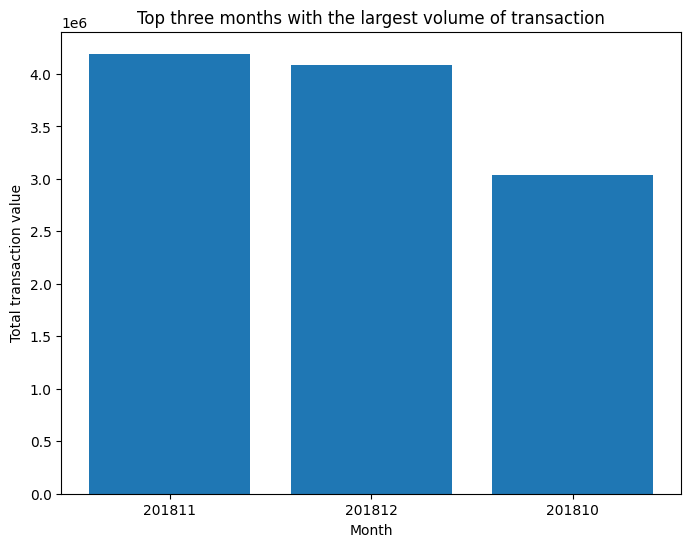

In [9]:
import mysqlSecrets
import mysql.connector as mydbconnection 
from mysql.connector import Error 
def top_largest_transaction():
    
    conn = mydbconnection.connect(
                    host = 'localhost',
                    database='creditcard_capstone',
                    user = mysqlSecrets.mysql_username,
                    password = mysqlSecrets.mysql_password
        )
                     
    mycursor = conn.cursor()   
    
    sql = f"select substring(TIMEID, 1, 6) as month, sum(TRANSACTION_VALUE) as total_TRANSACTION_VALUE from cdw_sapp_credit_card group by month order by total_TRANSACTION_VALUE DESC LIMIT 3 "
    try:
        mycursor.execute(sql)
         

    except:
        conn.rollback()

    top_3 = mycursor.fetchall()
    # create DataFrame using data
    df = pd.DataFrame(top_3, columns =['month', 'total_TRANSACTION_VALUE'])
    fig = plt.figure(figsize =(8, 6))

    plt.bar(df["month"], df["total_TRANSACTION_VALUE"])
    plt.xlabel("Month")
    plt.ylabel("Total transaction value")
    plt.title("Top three months with the largest volume of transaction")
    print(df)
    mycursor.close()
    conn.close()
top_largest_transaction()

Functional Requirements 5.4	
Find and plot which branch processed the highest total dollar value of healthcare transactions.
Note: Save a copy of the visualization to a folder in your github, making sure it is PROPERLY NAMED!. 

   BRANCH_CODE  TOTAL_HEALTHCARE_TRANSACTION
0           25                       65552.7
[(25, 65552.69999999998)]


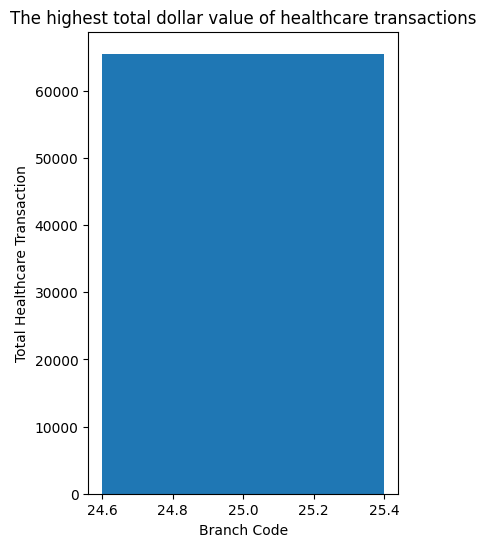

In [26]:

 

def highest_transaction():
    
    conn = mydbconnection.connect(
                    host = 'localhost',
                    database='creditcard_capstone',
                    user = mysqlSecrets.mysql_username,
                    password = mysqlSecrets.mysql_password
        )
                     
    mycursor = conn.cursor()   
    
    sql = f"SELECT BRANCH_CODE, SUM(TRANSACTION_VALUE) AS TOTAL_HEALTHCARE_TRANSACTION \
    FROM cdw_sapp_credit_card \
    WHERE TRANSACTION_TYPE = 'Healthcare'group by BRANCH_CODE \
    order by TOTAL_HEALTHCARE_TRANSACTION desc limit 1"
    try:
        mycursor.execute(sql)
         

    except:
        conn.rollback()

    highest = mycursor.fetchall()
     # create DataFrame using data
    df = pd.DataFrame(highest, columns =['BRANCH_CODE', 'TOTAL_HEALTHCARE_TRANSACTION'])
    fig = plt.figure(figsize =(4, 6))

    plt.bar(df["BRANCH_CODE"], df["TOTAL_HEALTHCARE_TRANSACTION"])
    plt.xlabel("Branch Code")
    plt.ylabel("Total Healthcare Transaction")
    plt.title("The highest total dollar value of healthcare transactions")
    print(df)
    print(highest)
    mycursor.close()
    conn.close()
highest_transaction()